In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast
import seaborn as sns


In [2]:
data=pd.read_csv('C:/Users/herry/Desktop/data mining/finalproject/Cars_cali.csv')
data

C:\Users\herry\AppData\Local\Temp\ipykernel_156356\1100961161.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('C:/Users/herry/Desktop/data mining/finalproject/Cars_cali.csv')


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZAM57YSS7L1343753,33.2 in,NaN,NaN,NaN,Sedan,NaN,Van Nuys,17.0,NaN,...,A,8-Speed Automatic,t87566,S GranSport 3.0L RWD,NaN,RWD,Rear-Wheel Drive,118 in,83.8 in,2020
1,ZAM57YSS1L1343750,33.2 in,NaN,NaN,NaN,Sedan,NaN,Van Nuys,17.0,NaN,...,A,8-Speed Automatic,t87566,S GranSport 3.0L RWD,NaN,RWD,Rear-Wheel Drive,118 in,83.8 in,2020
2,ZAM57YSS0L1343755,33.2 in,NaN,NaN,NaN,Sedan,NaN,Van Nuys,17.0,NaN,...,A,8-Speed Automatic,t87566,S GranSport 3.0L RWD,NaN,RWD,Rear-Wheel Drive,118 in,83.8 in,2020
3,ZAM57YSS6L1343159,33.2 in,NaN,NaN,NaN,Sedan,NaN,Van Nuys,17.0,NaN,...,A,8-Speed Automatic,t87566,S GranSport 3.0L RWD,NaN,RWD,Rear-Wheel Drive,118 in,83.8 in,2020
4,ZAM57YSS8L1343504,33.2 in,NaN,NaN,NaN,Sedan,NaN,Van Nuys,17.0,NaN,...,A,8-Speed Automatic,t87566,S GranSport 3.0L RWD,NaN,RWD,Rear-Wheel Drive,118 in,83.8 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176912,1FA6P8TH4K5112396,29 in,NaN,NaN,NaN,Coupe,NaN,Ukiah,21.0,NaN,...,A,Automatic,t78966,EcoBoost Coupe RWD,NaN,RWD,Rear-Wheel Drive,107.1 in,81.9 in,2019
176913,3GNCJLSB0KL221332,35.7 in,NaN,NaN,NaN,SUV / Crossover,NaN,Vallejo,26.0,NaN,...,A,Automatic,t80476,LT FWD,NaN,FWD,Front-Wheel Drive,100.6 in,69.9 in,2019
176914,2C3CDZBT8LH222948,33.1 in,NaN,NaN,NaN,Coupe,NaN,Napa,16.0,NaN,...,A,8-Speed Automatic,t90116,R/T RWD,NaN,RWD,Rear-Wheel Drive,116 in,85.4 in,2020
176915,3N6CM0KNXLK704386,--,NaN,NaN,NaN,Van,NaN,Napa,24.0,NaN,...,CVT,Continuously Variable Transmission,t88980,S FWD,NaN,FWD,Front-Wheel Drive,115.2 in,68.1 in,2020


#### EDA

In [3]:
# Data Shape
data.shape

(176917, 66)

In [4]:
data=data.loc[data['price'] < 120000]

# Data Prep & Cleaning

## Data Cleaning

#### Drop Null Columns

In [5]:
total_rows = data.shape[0]

# Calculate the percentage of null values in each column
null_percentage = (data.isnull().sum() / total_rows) * 100
null_percentage

vin                      0.000000
back_legroom             7.375631
bed                     99.916381
bed_height              91.009267
bed_length              91.009267
                          ...    
wheel_system             5.820094
wheel_system_display     5.820094
wheelbase                7.375631
width                    7.375631
year                     0.000000
Length: 66, dtype: float64

In [6]:
columns_to_drop = null_percentage[null_percentage > 50].index
columns_to_drop = columns_to_drop.drop(['fleet', 'frame_damaged', 'has_accidents', 'isCab'])

data_cleaned = data.drop(columns=columns_to_drop)

In [7]:
null_percentage

vin                      0.000000
back_legroom             7.375631
bed                     99.916381
bed_height              91.009267
bed_length              91.009267
                          ...    
wheel_system             5.820094
wheel_system_display     5.820094
wheelbase                7.375631
width                    7.375631
year                     0.000000
Length: 66, dtype: float64

In [8]:
columns_to_drop

Index(['bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy',
       'is_certified', 'is_cpo', 'is_oemcpo', 'owner_count', 'salvage',
       'theft_title', 'vehicle_damage_category'],
      dtype='object')

#### Duplicated Data

In [9]:
has_duplicates = data_cleaned.duplicated().any()
has_duplicates

False

#### Drop Rows contain null values

In [10]:
data_cleaned=data_cleaned.dropna()

#### Drop Unrelated Columns

In [11]:
dropping=['vin','main_picture_url','city','dealer_zip','description','engine_type','latitude','listed_date','listing_id','longitude','model_name','sp_id','sp_name','transmission_display','trimId','trim_name','wheel_system_display','franchise_make']
data_cleaned=data_cleaned.drop(dropping,axis=1)

#### Drop Redudent Column

In [12]:
data_cleaned=data_cleaned.drop('exterior_color',axis=1) # exterior_color and listing_color is the same, so we droppping exterior color

In [13]:
data_cleaned.shape

(15009, 35)

# Data Prep

## Data Prep for Numerical Columns

#### Data regularzation

In [14]:
convert_list = ["back_legroom" ,"front_legroom" ,"height" ,"length" ,"wheelbase" ,"width" ,"fuel_tank_volume"] ## columns to convert

In [15]:
for i in convert_list:
    data_cleaned[i] = data_cleaned[i].str.extract('(\d+\.?\d*)').astype(float)
    data_cleaned = data_cleaned.rename(columns={i: f"{i}(inch)"})

In [16]:
data_cleaned["maximum_seating"] = data_cleaned["maximum_seating"].str.extract('(\d+\.?\d*)').astype(int)

#### Standardize horsepower and tourque

In [17]:
data_cleaned[['horsepower', 'RPM']] = data_cleaned['power'].str.split(' @ ', expand=True)
data_cleaned['horsepower'] = data_cleaned['horsepower'].str.replace(' hp', '').astype(float)

# Calculate horsepower
data_cleaned['torque_lbft(5000rpm)'] = ((data_cleaned['horsepower'] * 5252) / 5000).astype(int)
data_cleaned=data_cleaned.drop(['RPM','power','torque'],axis=1)

#### Create an new columns for general fuel economy 

In [18]:
data_cleaned['general_fuel_economy'] = (0.55 * data_cleaned['city_fuel_economy']) + (0.45 * data_cleaned['highway_fuel_economy'])
                                                                                                                            # calculation weight was assigned based on industry calculation formula
data_cleaned=data_cleaned.drop(['city_fuel_economy','highway_fuel_economy'],axis=1)

#### Create new column for wheel base to width ratio

In [19]:
data_cleaned['wheelbase_to_width_ratio'] = data_cleaned['wheelbase(inch)']/data_cleaned['width(inch)']
data_cleaned=data_cleaned.drop(['wheelbase(inch)','width(inch)'],axis=1)

### create an new column for car age

In [20]:
from datetime import datetime
current_year = datetime.now().year

In [21]:
data_cleaned['car_age'] = current_year - data_cleaned['year']
data_cleaned=data_cleaned.drop('year',axis=1)

In [22]:
data_cleaned

,back_legroom(inch),body_type,daysonmarket,engine_cylinders,engine_displacement,fleet,frame_damaged,franchise_dealer,front_legroom(inch),fuel_tank_volume(inch),...,mileage,price,savings_amount,seller_rating,transmission,wheel_system,torque_lbft(5000rpm),general_fuel_economy,wheelbase_to_width_ratio,car_age
25,40.1,Sedan,40,V6,3600.0,True,False,True,41.8,18.5,...,17773,23225.0,3532,4.400000,A,RWD,306,23.95,1.602667,5
26,35.8,SUV / Crossover,25,I4,1400.0,False,False,True,40.8,14.0,...,2658,17488.0,3385,4.916667,A,AWD,144,26.25,1.435093,5
28,35.2,Sedan,105,I4,2000.0,False,False,True,42.0,15.6,...,4660,34988.0,4858,4.500000,A,RWD,267,30.50,1.378378,4
29,36.6,SUV / Crossover,44,V6,3500.0,False,False,True,41.4,19.5,...,10260,41597.0,4199,4.517241,A,AWD,304,22.15,1.428571,5
31,38.0,SUV / Crossover,34,I4,2000.0,False,False,True,42.0,17.1,...,7592,35515.0,2494,4.666667,A,FWD,285,24.70,1.447861,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176891,40.1,Sedan,42,V8,5700.0,False,False,True,41.8,18.5,...,6203,36998.0,2944,4.533333,A,RWD,388,20.05,1.602667,7
176899,38.3,SUV / Crossover,0,I4,2400.0,False,False,True,41.8,13.5,...,14355,21000.0,1432,4.384615,A,FWD,189,26.05,1.297500,6
176906,31.7,Hatchback,3,I4,1400.0,False,False,True,40.7,10.5,...,8673,11412.0,2367,4.533333,M,FWD,141,30.25,1.232653,6
176912,29.0,Coupe,30,I4,2300.0,False,False,True,45.1,15.5,...,17035,26994.0,2257,5.000000,A,RWD,325,25.95,1.307692,5


## Data Prep for Categorical Columns

#### Create an column for each options within major_options

In [23]:
from ast import literal_eval

def parse_string(s):
    if isinstance(s, str):    
        if ',' in s:
            try:
                return list(literal_eval(s))
            except (ValueError, SyntaxError):
                return []
        elif s == '':
            return ''
        else:
            return [s]  # Ensure this is a list

# Apply the function to the 'major_options' column and create a new column 'ParsedColumn'
data_cleaned['ParsedColumn'] = data_cleaned['major_options'].apply(parse_string)
data_cleaned

,back_legroom(inch),body_type,daysonmarket,engine_cylinders,engine_displacement,fleet,frame_damaged,franchise_dealer,front_legroom(inch),fuel_tank_volume(inch),...,price,savings_amount,seller_rating,transmission,wheel_system,torque_lbft(5000rpm),general_fuel_economy,wheelbase_to_width_ratio,car_age,ParsedColumn
25,40.1,Sedan,40,V6,3600.0,True,False,True,41.8,18.5,...,23225.0,3532,4.400000,A,RWD,306,23.95,1.602667,5,"[Sunroof/Moonroof, Alloy Wheels, Bluetooth, Ba..."
26,35.8,SUV / Crossover,25,I4,1400.0,False,False,True,40.8,14.0,...,17488.0,3385,4.916667,A,AWD,144,26.25,1.435093,5,"[Safety Package, Alloy Wheels, Bluetooth, Back..."
28,35.2,Sedan,105,I4,2000.0,False,False,True,42.0,15.6,...,34988.0,4858,4.500000,A,RWD,267,30.50,1.378378,4,"[Sunroof/Moonroof, Navigation System, Alloy Wh..."
29,36.6,SUV / Crossover,44,V6,3500.0,False,False,True,41.4,19.5,...,41597.0,4199,4.517241,A,AWD,304,22.15,1.428571,5,"[Leather Seats, Sunroof/Moonroof, Navigation S..."
31,38.0,SUV / Crossover,34,I4,2000.0,False,False,True,42.0,17.1,...,35515.0,2494,4.666667,A,FWD,285,24.70,1.447861,4,"[Leather Seats, Sunroof/Moonroof, Navigation S..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176891,40.1,Sedan,42,V8,5700.0,False,False,True,41.8,18.5,...,36998.0,2944,4.533333,A,RWD,388,20.05,1.602667,7,"[Navigation System, Alloy Wheels, Bluetooth, B..."
176899,38.3,SUV / Crossover,0,I4,2400.0,False,False,True,41.8,13.5,...,21000.0,1432,4.384615,A,FWD,189,26.05,1.297500,6,"[Alloy Wheels, Bluetooth, Backup Camera]"
176906,31.7,Hatchback,3,I4,1400.0,False,False,True,40.7,10.5,...,11412.0,2367,4.533333,M,FWD,141,30.25,1.232653,6,"[Alloy Wheels, Bluetooth, Backup Camera, Quick..."
176912,29.0,Coupe,30,I4,2300.0,False,False,True,45.1,15.5,...,26994.0,2257,5.000000,A,RWD,325,25.95,1.307692,5,"[Alloy Wheels, Backup Camera]"


In [24]:
#Creates a dictionary that has the count of each seperate option
possible_options = {}
for options in data_cleaned['ParsedColumn']:
    if options is not None:
        for option in options:
            if option not in possible_options:
                possible_options[option] = 1
            else:
                possible_options[option] = possible_options[option] + 1

In [25]:
#limited the number of possible options to greater than 1,030 instances
possible_options_sorted = sorted(possible_options.items(), key = lambda x: x[1], reverse = True)
possible_options_limited =  {key: value for key, value in possible_options.items() if value >= 1030}

In [26]:
#Create dummy variables for those options and append them to the cars dataframe
#HOWEVER -> look at next section to show which x number of features I actually put into the dataframe
for option in possible_options_limited:
    data_cleaned[option] = data_cleaned['major_options'].str.contains(option).astype('object')
data_cleaned=data_cleaned.drop(['major_options','ParsedColumn'],axis=1)
data_cleaned

,back_legroom(inch),body_type,daysonmarket,engine_cylinders,engine_displacement,fleet,frame_damaged,franchise_dealer,front_legroom(inch),fuel_tank_volume(inch),...,Android Auto,CarPlay,Blind Spot Monitoring,Navigation System,Leather Seats,Adaptive Cruise Control,Third Row Seating,Heated Seats,Convenience Package,Premium Package
25,40.1,Sedan,40,V6,3600.0,True,False,True,41.8,18.5,...,True,True,False,False,False,False,False,False,False,False
26,35.8,SUV / Crossover,25,I4,1400.0,False,False,True,40.8,14.0,...,True,True,True,False,False,False,False,False,False,False
28,35.2,Sedan,105,I4,2000.0,False,False,True,42.0,15.6,...,False,True,False,True,False,False,False,False,False,False
29,36.6,SUV / Crossover,44,V6,3500.0,False,False,True,41.4,19.5,...,False,False,True,True,True,True,True,True,False,False
31,38.0,SUV / Crossover,34,I4,2000.0,False,False,True,42.0,17.1,...,True,True,True,True,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176891,40.1,Sedan,42,V8,5700.0,False,False,True,41.8,18.5,...,True,True,False,True,False,False,False,True,False,False
176899,38.3,SUV / Crossover,0,I4,2400.0,False,False,True,41.8,13.5,...,False,False,False,False,False,False,False,False,False,False
176906,31.7,Hatchback,3,I4,1400.0,False,False,True,40.7,10.5,...,False,False,False,False,False,False,False,False,False,False
176912,29.0,Coupe,30,I4,2300.0,False,False,True,45.1,15.5,...,False,False,False,False,False,False,False,False,False,False


### Aggregate Interior colors

In [27]:
def map_color_to_basic(color, color_dict):
    for basic_color, variations in color_dict.items():
        if color in variations:
            return basic_color
    return 'other'

In [28]:
color_dict = {
    'black': ['black', 'blk', 'bl', 'ebony', 'balck', 'blck', 'jet', 'charcoal', 'bkack', 'blacl', 'bk', 'nero', 'char', 'char lthette', 'char clth', 'char lth-appointed'],
    'white': ['white', 'light neutral', 'ceramic', 'cream', 'creme', 'parchment', 'ivory', 'alabaster', 'snow', 'porcelain', 'linen', 'ice/lunar', 'iv wht vrnsca lth uph(mc)'],
    'gray': ['gray', 'silver', 'cement', 'grey', 'oyster', 'stone', 'graphite', 'gideon', 'ash', 'putty', 'stone', 'greige', 'galvan', 'titanium', 'beluga', 'silver', 'pewter', 'slate', 'steel', 'graph softex', 'dark atmospher', 'smoke storm', 'shale', 'light shale'],
    'blue': ['blue', 'blu', 'cirrus', 'navy', 'azure', 'cobalt', 'cerulean', 'indigo', 'sapphire', 'turquoise', 'teal', 'lapis'],
    'red': ['red', 'rd', 'terracotta', 'cranberry', 'crimson', 'ruby', 'burgundy', 'maroon', 'scarlet', 'carmine', 'rosso'],
    'brown': ['brown', 'machiato', 'suede', 'cappuccino', 'latte', 'caml', 'caramel', 'mocha', 'coffee', 'camel', 'maple sugar', 'chestnut', 'cocoa', 'dune', 'cinnamon', 'espresso', 'saddle', 'cuoio', 'cognac', 'almond', 'bourbon', 'brandy', 'acorn', 'sepia', 'auburn', 'saddle', 'copper', 'chestnut', 'mahogany', 'walnut', 'chateau', 'java', 'nutmeg', 'sabbia'],
    'green': ['green', 'emerald', 'olive', 'lime', 'jade', 'mint', 'sage', 'chartreuse'],
    'pink': ['pink', 'rose', 'fuchsia', 'magenta', 'blush', 'coral'],
    'beige': ['beige', 'biege','avorio', 'tan', 'ecru', 'khaki', 'sand', 'camel', 'oatmeal', 'bisque', 'buff', 'flaxen', 'birch', 'beigevynl', 'beigeleather'],
    'orange': ['orange', 'amber', 'tangerine', 'coral', 'salmon', 'peach'],
    'purple': ['purple', 'violet', 'lavender', 'lilac', 'plum', 'orchid', 'mauve'],
    'yellow': ['yellow', 'gold', 'amber', 'lemon', 'mustard', 'canary', 'blond', 'gold'],
    'metallic': ['metallic', 'alloy', 'chrome'],
    'cloth': ['cloth', 'sport interior', 'sport', 'luxury', 'destination', 'rock creek'],
    'other': ['other', 'unknown', 'no color', '.', '1', '21', 'gone', 'kbtx','es cvt','se auto', 've', 'nb', 'yr-600', 'hvc', 'h2u', 'h0y', 'kcsw', 'kccx', 'lcsw', 'lcfk', 'k8sw', 'pdfm', 'lcnl', 'lud3', 'lcry', 'k8fy', 'lcfi', 'lzfk', 'vatq', '204/marsala bro', 'lt pty', 'sedona sauvage', 'eb', 't9x8', 'br', 'saffron', 'flaxen w/linear wood', 'xse', 'rosso', 'dt', 'en', 'nh-603', 'tn', 'gw', 'crema', 'lt atmosphere', '08/21/2020', 'nouga', 'rock', 'medium flint']
}
data_cleaned['interior_color'] = data_cleaned['interior_color'].str.lower()
data_cleaned['interior_color'] = data_cleaned['interior_color'].apply(map_color_to_basic, color_dict=color_dict)

print(data_cleaned['interior_color'].unique())

['black' 'other' 'brown' 'white' 'gray' 'cloth' 'red' 'blue' 'metallic'
 'beige' 'yellow' 'orange' 'green']


In [29]:
print(data_cleaned['listing_color'].unique()) ### see if listing colors need aggregation

['UNKNOWN' 'SILVER' 'BLACK' 'WHITE' 'BLUE' 'GRAY' 'RED' 'GREEN' 'BROWN'
 'ORANGE' 'PURPLE' 'GOLD' 'TEAL' 'YELLOW' 'PINK']


### Column Reduction/ Feature Reduction using correlaiton

#### Correlation

C:\Users\herry\AppData\Local\Temp\ipykernel_156356\1095761789.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrolation_df = data_cleaned.corr()


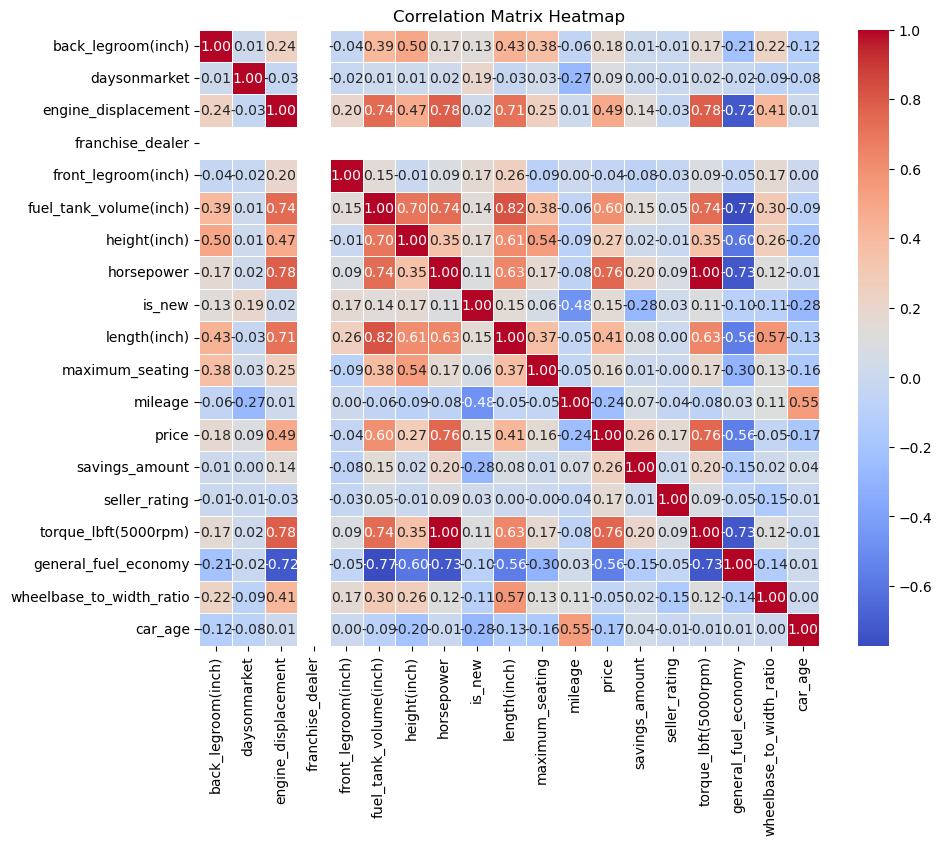

In [30]:
corrolation_df = data_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corrolation_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\herry\AppData\Local\Temp\ipykernel_156356\3277777734.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrolation_df = data_cleaned.corr()


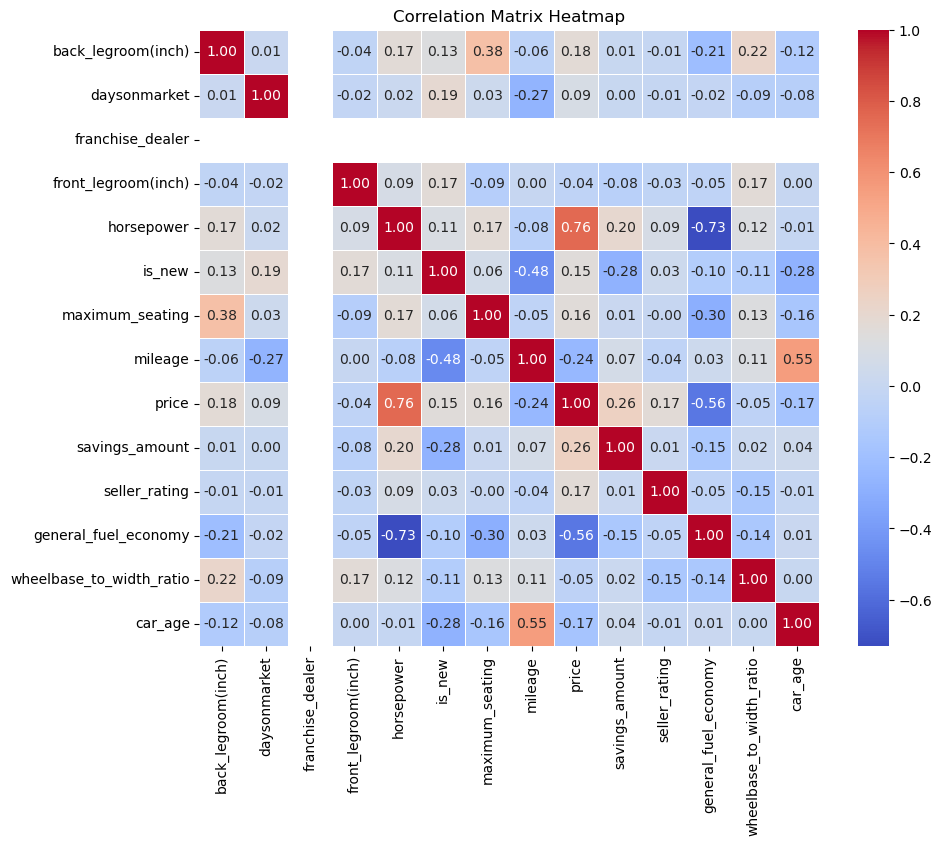

In [31]:
highcorrcolumns_to_drop = ['engine_displacement', 'torque_lbft(5000rpm)','fuel_tank_volume(inch)','length(inch)','height(inch)']
data_cleaned = data_cleaned.drop(highcorrcolumns_to_drop,axis=1)
corrolation_df = data_cleaned.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corrolation_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Use Cramer's V to find high correlated categorical columns for categorical column reduction

### reason why conversion of categorical column did not happend during the last stage is becasue if we convert columns during last stage, the correlation heat map would be too big and we can not retrive useful information from that

In [32]:
columns_to_convert = ['fleet', 'frame_damaged', 'has_accidents', 'franchise_dealer','Android Auto','isCab', 'is_new', 'Sunroof/Moonroof', 'Alloy Wheels', 'Bluetooth',
                      'Backup Camera', 'Remote Start', 'Parking Sensors', 'CarPlay', 'Blind Spot Monitoring', 'Navigation System',
                      'Leather Seats', 'Adaptive Cruise Control', 'Third Row Seating', 'Heated Seats', 'Convenience Package',
                      'Premium Package','body_type','fuel_type','maximum_seating','transmission','wheel_system','engine_cylinders','interior_color','listing_color','make_name', 'car_age']
for col in columns_to_convert:
    data_cleaned[col] = data_cleaned[col].astype('category')

In [33]:
data_cleaned

,back_legroom(inch),body_type,daysonmarket,engine_cylinders,fleet,frame_damaged,franchise_dealer,front_legroom(inch),fuel_type,has_accidents,...,Android Auto,CarPlay,Blind Spot Monitoring,Navigation System,Leather Seats,Adaptive Cruise Control,Third Row Seating,Heated Seats,Convenience Package,Premium Package
25,40.1,Sedan,40,V6,True,False,True,41.8,Gasoline,False,...,True,True,False,False,False,False,False,False,False,False
26,35.8,SUV / Crossover,25,I4,False,False,True,40.8,Gasoline,False,...,True,True,True,False,False,False,False,False,False,False
28,35.2,Sedan,105,I4,False,False,True,42.0,Gasoline,False,...,False,True,False,True,False,False,False,False,False,False
29,36.6,SUV / Crossover,44,V6,False,False,True,41.4,Gasoline,False,...,False,False,True,True,True,True,True,True,False,False
31,38.0,SUV / Crossover,34,I4,False,False,True,42.0,Gasoline,False,...,True,True,True,True,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176891,40.1,Sedan,42,V8,False,False,True,41.8,Gasoline,False,...,True,True,False,True,False,False,False,True,False,False
176899,38.3,SUV / Crossover,0,I4,False,False,True,41.8,Gasoline,False,...,False,False,False,False,False,False,False,False,False,False
176906,31.7,Hatchback,3,I4,False,False,True,40.7,Gasoline,False,...,False,False,False,False,False,False,False,False,False,False
176912,29.0,Coupe,30,I4,False,False,True,45.1,Gasoline,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
data_cleaned.dtypes

back_legroom(inch)           float64
body_type                   category
daysonmarket                   int64
engine_cylinders            category
fleet                       category
frame_damaged               category
franchise_dealer            category
front_legroom(inch)          float64
fuel_type                   category
has_accidents               category
horsepower                   float64
interior_color              category
isCab                       category
is_new                      category
listing_color               category
make_name                   category
maximum_seating             category
mileage                        int64
price                        float64
savings_amount                 int64
seller_rating                float64
transmission                category
wheel_system                category
general_fuel_economy         float64
wheelbase_to_width_ratio     float64
car_age                     category
Sunroof/Moonroof            category
A

### Convert categorical columns into object column type in order to use cramers'v

In [35]:
data_cleaned['franchise_dealer'] = data_cleaned['franchise_dealer'].astype(object)
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'int64':
        data_cleaned[col] = data_cleaned[col].astype(float)
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'int32':
        data_cleaned[col] = data_cleaned[col].astype(object)
# Check the data types
print(data_cleaned.dtypes)

back_legroom(inch)           float64
body_type                   category
daysonmarket                 float64
engine_cylinders            category
fleet                       category
frame_damaged               category
franchise_dealer              object
front_legroom(inch)          float64
fuel_type                   category
has_accidents               category
horsepower                   float64
interior_color              category
isCab                       category
is_new                      category
listing_color               category
make_name                   category
maximum_seating             category
mileage                      float64
price                        float64
savings_amount               float64
seller_rating                float64
transmission                category
wheel_system                category
general_fuel_economy         float64
wheelbase_to_width_ratio     float64
car_age                     category
Sunroof/Moonroof            category
A

### Create Cramer'v function

In [36]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    denom = min((k_corr-1), (r_corr-1))
    if denom <= 0:  # Avoid division by zero or negative numbers
        return 0
    return (phi2_corr / denom)**0.5

#### calculate cramer's v

In [37]:
categorical_columns = data_cleaned.select_dtypes(include=['category', 'object']).columns
cramer_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramer_v_value = cramers_v(data_cleaned[col1], data_cleaned[col2])
        cramer_v_matrix.loc[col1, col2] = round(cramer_v_value, 4)
cramer_v_matrix

,body_type,engine_cylinders,fleet,frame_damaged,franchise_dealer,fuel_type,has_accidents,interior_color,isCab,is_new,...,Android Auto,CarPlay,Blind Spot Monitoring,Navigation System,Leather Seats,Adaptive Cruise Control,Third Row Seating,Heated Seats,Convenience Package,Premium Package
body_type,1.0000,0.2908,0.1698,0.0000,0.0,0.1502,0.0163,0.1099,0.1722,0.1659,...,0.0674,0.0558,0.2215,0.1745,0.1786,0.2046,0.4431,0.2059,0.0973,0.1230
engine_cylinders,0.2908,1.0000,0.1708,0.0000,0.0,0.9995,0.0000,0.0503,0.1703,0.2099,...,0.1503,0.1250,0.1659,0.2976,0.2476,0.2471,0.3256,0.2585,0.1637,0.1340
fleet,0.1698,0.1708,0.9996,0.0000,0.0,0.0427,0.0075,0.0662,0.9502,0.1096,...,0.1507,0.1366,0.0053,0.0882,0.0118,0.0484,0.0535,0.0308,0.0813,0.0708
frame_damaged,0.0000,0.0000,0.0000,0.8333,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
franchise_dealer,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
fuel_type,0.1502,0.9995,0.0427,0.0000,0.0,1.0000,0.0000,0.0221,0.0291,0.1043,...,0.0368,0.0557,0.0950,0.0899,0.0804,0.0781,0.0212,0.0996,0.0096,0.0390
has_accidents,0.0163,0.0000,0.0075,0.0000,0.0,0.0000,0.9984,0.0276,0.0000,0.0462,...,0.0080,0.0161,0.0129,0.0192,0.0000,0.0110,0.0000,0.0000,0.0082,0.0000
interior_color,0.1099,0.0503,0.0662,0.0000,0.0,0.0221,0.0276,1.0000,0.0672,0.1838,...,0.0547,0.0620,0.0866,0.1393,0.1040,0.0941,0.1298,0.0931,0.0928,0.0752
isCab,0.1722,0.1703,0.9502,0.0000,0.0,0.0291,0.0000,0.0672,0.9996,0.1042,...,0.1550,0.1421,0.0175,0.0781,0.0217,0.0441,0.0570,0.0206,0.0817,0.0680
is_new,0.1659,0.2099,0.1096,0.0000,0.0,0.1043,0.0462,0.1838,0.1042,0.9996,...,0.0747,0.0266,0.0819,0.0122,0.0390,0.0186,0.0054,0.0650,0.0508,0.0681


In [38]:
high_corr_pairs = []

# Iterate over the DataFrame and extract high correlation pairs
for i in range(len(cramer_v_matrix.columns)):
    for j in range(i+1, len(cramer_v_matrix.columns)):
        if abs(cramer_v_matrix.iloc[i, j]) > 0.5:
            high_corr_pairs.append((cramer_v_matrix.columns[i], cramer_v_matrix.columns[j]))

# Print the list of high correlation pairs
print(high_corr_pairs)


[('body_type', 'wheel_system'), ('engine_cylinders', 'fuel_type'), ('fleet', 'isCab'), ('is_new', 'make_name'), ('make_name', 'wheel_system'), ('make_name', 'Sunroof/Moonroof'), ('make_name', 'Navigation System'), ('make_name', 'Adaptive Cruise Control'), ('maximum_seating', 'Third Row Seating'), ('Android Auto', 'CarPlay')]


#### Drop high correlated categrocial columns

In [39]:
columns_to_drop=['fuel_type','fleet','wheel_system','Third Row Seating']
data_cleaned=data_cleaned.drop(columns_to_drop,axis=1)

#### Calculate cramer's v again

In [40]:
categorical_columns = data_cleaned.select_dtypes(include=['category', 'object']).columns
cramer_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramer_v_value = cramers_v(data_cleaned[col1], data_cleaned[col2])
        cramer_v_matrix.loc[col1, col2] = round(cramer_v_value, 4)
cramer_v_matrix

,body_type,engine_cylinders,frame_damaged,franchise_dealer,has_accidents,interior_color,isCab,is_new,listing_color,make_name,...,Parking Sensors,Android Auto,CarPlay,Blind Spot Monitoring,Navigation System,Leather Seats,Adaptive Cruise Control,Heated Seats,Convenience Package,Premium Package
body_type,1.0000,0.2908,0.0000,0.0,0.0163,0.1099,0.1722,0.1659,0.0828,0.3744,...,0.1197,0.0674,0.0558,0.2215,0.1745,0.1786,0.2046,0.2059,0.0973,0.1230
engine_cylinders,0.2908,1.0000,0.0000,0.0,0.0000,0.0503,0.1703,0.2099,0.0661,0.3711,...,0.2162,0.1503,0.1250,0.1659,0.2976,0.2476,0.2471,0.2585,0.1637,0.1340
frame_damaged,0.0000,0.0000,0.8333,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
franchise_dealer,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
has_accidents,0.0163,0.0000,0.0000,0.0,0.9984,0.0276,0.0000,0.0462,0.0148,0.0427,...,0.0066,0.0080,0.0161,0.0129,0.0192,0.0000,0.0110,0.0000,0.0082,0.0000
interior_color,0.1099,0.0503,0.0000,0.0,0.0276,1.0000,0.0672,0.1838,0.0511,0.2818,...,0.1140,0.0547,0.0620,0.0866,0.1393,0.1040,0.0941,0.0931,0.0928,0.0752
isCab,0.1722,0.1703,0.0000,0.0,0.0000,0.0672,0.9996,0.1042,0.0650,0.3409,...,0.0658,0.1550,0.1421,0.0175,0.0781,0.0217,0.0441,0.0206,0.0817,0.0680
is_new,0.1659,0.2099,0.0000,0.0,0.0462,0.1838,0.1042,0.9996,0.0346,0.5164,...,0.0663,0.0747,0.0266,0.0819,0.0122,0.0390,0.0186,0.0650,0.0508,0.0681
listing_color,0.0828,0.0661,0.0000,0.0,0.0148,0.0511,0.0650,0.0346,1.0000,0.1280,...,0.0527,0.0441,0.0164,0.0393,0.0963,0.0546,0.0867,0.0800,0.0757,0.0504
make_name,0.3744,0.3711,0.0000,0.0,0.0427,0.2818,0.3409,0.5164,0.1280,1.0000,...,0.3664,0.4041,0.3362,0.4361,0.5019,0.4039,0.5254,0.4146,0.4578,0.4340


In [41]:
high_corr_pairs = []

# Iterate over the DataFrame and extract high correlation pairs
for i in range(len(cramer_v_matrix.columns)):
    for j in range(i+1, len(cramer_v_matrix.columns)):
        if abs(cramer_v_matrix.iloc[i, j]) > 0.5:
            high_corr_pairs.append((cramer_v_matrix.columns[i], cramer_v_matrix.columns[j]))

# Print the list of high correlation pairs
print(high_corr_pairs)

[('is_new', 'make_name'), ('make_name', 'Sunroof/Moonroof'), ('make_name', 'Navigation System'), ('make_name', 'Adaptive Cruise Control'), ('Android Auto', 'CarPlay')]


look at the result, we could see that make name is highly correlated with a lot of categorical column, but due to our business problem, make name is important for the model, so we do not drop it.

### encode nominal categorical columns for model building

### create an copy of the data before encoding

In [42]:
data_backup=data_cleaned.copy()

In [43]:
data_cleaned

,back_legroom(inch),body_type,daysonmarket,engine_cylinders,frame_damaged,franchise_dealer,front_legroom(inch),has_accidents,horsepower,interior_color,...,Parking Sensors,Android Auto,CarPlay,Blind Spot Monitoring,Navigation System,Leather Seats,Adaptive Cruise Control,Heated Seats,Convenience Package,Premium Package
25,40.1,Sedan,40.0,V6,False,True,41.8,False,292.0,black,...,True,True,True,False,False,False,False,False,False,False
26,35.8,SUV / Crossover,25.0,I4,False,True,40.8,False,138.0,other,...,False,True,True,True,False,False,False,False,False,False
28,35.2,Sedan,105.0,I4,False,True,42.0,False,255.0,other,...,False,False,True,False,True,False,False,False,False,False
29,36.6,SUV / Crossover,44.0,V6,False,True,41.4,False,290.0,black,...,False,False,False,True,True,True,True,True,False,False
31,38.0,SUV / Crossover,34.0,I4,False,True,42.0,False,272.0,other,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176891,40.1,Sedan,42.0,V8,False,True,41.8,False,370.0,black,...,False,True,True,False,True,False,False,True,False,False
176899,38.3,SUV / Crossover,0.0,I4,False,True,41.8,False,180.0,black,...,False,False,False,False,False,False,False,False,False,False
176906,31.7,Hatchback,3.0,I4,False,True,40.7,False,135.0,other,...,False,False,False,False,False,False,False,False,False,False
176912,29.0,Coupe,30.0,I4,False,True,45.1,False,310.0,other,...,False,False,False,False,False,False,False,False,False,False


In [44]:
def one_hot_encode_cols(data_cleaned, col):
    one_hot_encoded = pd.get_dummies(data_cleaned[col],prefix=col).astype(int)
    data_cleaned = pd.concat([data_cleaned, one_hot_encoded], axis=1)
    data_cleaned = data_cleaned.drop(columns={col})
    return data_cleaned

In [45]:
columns_to_encode = ['frame_damaged', 'has_accidents', 'franchise_dealer','Android Auto','isCab', 'is_new', 'Sunroof/Moonroof', 'Alloy Wheels', 'Bluetooth',
                      'Backup Camera', 'Remote Start', 'Parking Sensors', 'CarPlay', 'Blind Spot Monitoring', 'Navigation System',
                      'Leather Seats', 'Adaptive Cruise Control', 'Heated Seats', 'Convenience Package',
                      'Premium Package','body_type','maximum_seating','transmission','engine_cylinders','interior_color','listing_color','make_name','car_age']

for col in columns_to_encode:
    data_cleaned = one_hot_encode_cols(data_cleaned, col)

In [46]:
data_cleaned.shape

(15009, 177)

In [47]:
data_cleaned.isnull().any()

back_legroom(inch)      True
daysonmarket           False
front_legroom(inch)     True
horsepower             False
mileage                False
                       ...  
car_age_17             False
car_age_18             False
car_age_19             False
car_age_23             False
car_age_24             False
Length: 177, dtype: bool

# Feature Selection

## Decision tree to pick out most important columns

In [48]:
print(type(data_cleaned))  # Should be <class 'pandas.core.frame.DataFrame'>
print(type('price'))

<class 'pandas.core.frame.DataFrame'>
<class 'str'>


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

C:\Users\herry\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [50]:
data_model= data_cleaned.copy()
data_model= data_model.dropna()
# Separate features and target
X = data_model.drop(columns=['price'])
y = data_model['price']

In [51]:
from sklearn.tree import DecisionTreeRegressor
# Fit the decision tree model

treeModel = DecisionTreeRegressor(random_state=17)
treeModel.fit(X, y)

# Get feature importances
importances = treeModel.feature_importances_

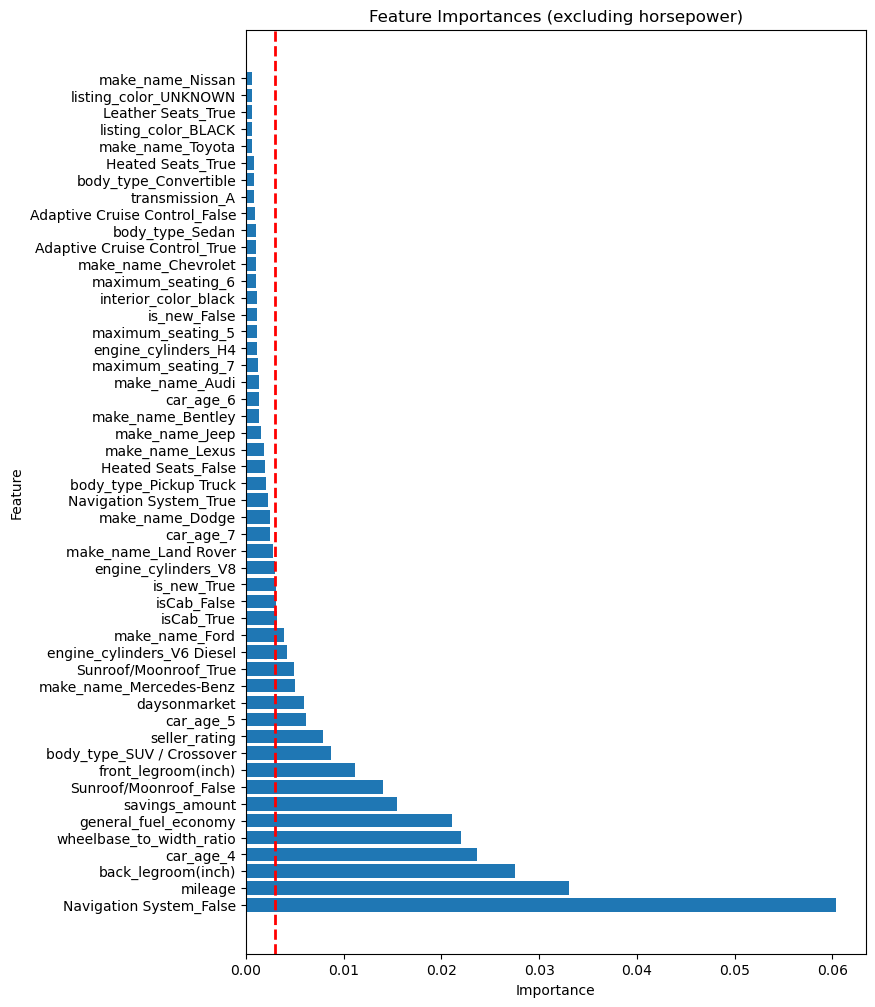

In [52]:
feature_name = np.delete(X.columns, np.where(X.columns == "horsepower"))
importance = np.delete(importances, np.where(X.columns == "horsepower"))

# Sort features by importance
sorted_indices = importance.argsort()[::-1]
sorted_feature_names = feature_name[sorted_indices]
sorted_importances = importance[sorted_indices]

# Plot feature importances for the features (excluding "horsepower")
plt.figure(figsize=(8, 12))
plt.barh(sorted_feature_names[:50], sorted_importances[:50], align='center')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Feature Importances (excluding horsepower)')

# Draw a vertical threshold line
threshold = 0.003
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=2)
plt.show()

In [53]:
selected_feature_names = feature_name[importance > 0.003]
selected_feature_names ### we have to add horsepower

Index(['back_legroom(inch)', 'daysonmarket', 'front_legroom(inch)', 'mileage',
       'savings_amount', 'seller_rating', 'general_fuel_economy',
       'wheelbase_to_width_ratio', 'isCab_False', 'isCab_True', 'is_new_True',
       'Sunroof/Moonroof_False', 'Sunroof/Moonroof_True',
       'Navigation System_False', 'body_type_SUV / Crossover',
       'engine_cylinders_V6 Diesel', 'engine_cylinders_V8', 'make_name_Ford',
       'make_name_Mercedes-Benz', 'car_age_4', 'car_age_5'],
      dtype='object')

In [54]:
feature_names = X.columns

# Sort the feature importances in descending order and get the indices of the top 20
indices = np.argsort(importances)[::-1][:30]

# Get the top 20 feature names and their importance scores
top_20_features = [(feature_names[i], importances[i]) for i in indices]

# Print the top 20 features
for feature, importance in top_20_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: horsepower, Importance: 0.6571384879781892
Feature: Navigation System_False, Importance: 0.060385353255073375
Feature: mileage, Importance: 0.03302737292062465
Feature: back_legroom(inch), Importance: 0.027581887762326777
Feature: car_age_4, Importance: 0.023607413995549466
Feature: wheelbase_to_width_ratio, Importance: 0.02196256796852079
Feature: general_fuel_economy, Importance: 0.02104207395687777
Feature: savings_amount, Importance: 0.01542010741991779
Feature: Sunroof/Moonroof_False, Importance: 0.014084102739408688
Feature: front_legroom(inch), Importance: 0.011148123676135732
Feature: body_type_SUV / Crossover, Importance: 0.008699374225122961
Feature: seller_rating, Importance: 0.007871962433923805
Feature: car_age_5, Importance: 0.006193558300792464
Feature: daysonmarket, Importance: 0.005913766088292476
Feature: make_name_Mercedes-Benz, Importance: 0.005062187927912215
Feature: Sunroof/Moonroof_True, Importance: 0.0049360882349546165
Feature: engine_cylinders_V6 Die

### Based on the feature importance graph, we decide to cut off at seller's rating columns that leaves us 17 features (16 if combine dummy varaible columns)

## Create an new df based on feature important score

In [55]:
cat = ['isCab','is_new','Sunroof/Moonroof','Navigation System','body_type','engine_cylinders','make_name','car_age']
num = ['horsepower','back_legroom(inch)', 'daysonmarket', 'front_legroom(inch)', 'mileage',
       'savings_amount', 'seller_rating', 'general_fuel_economy',
       'wheelbase_to_width_ratio']

In [56]:
features = cat + num

In [57]:
features.append('price')

In [58]:
data_selected=data_backup[features]

In [59]:
for feature in data_selected:
    if feature in cat:
        data_backup = one_hot_encode_cols(data_backup, feature)

## Save Data

In [60]:
# data_backup.to_csv('cleaned_car_another.csv', index=False)